In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

import kagglehub


/home/jane/Documents/Weiterbildung/DPP/portfolio_project/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dataset_link = "cdminix/us-drought-meteorological-data" # replace with your dataset link from Kaggle 
path = kagglehub.dataset_download(dataset_link)
print(path)

Destination directory '../data/raw/us-drought-meteorological-data' already exists with files. Skipping download (replace=False).
/home/jane/.cache/kagglehub/datasets/cdminix/us-drought-meteorological-data/versions/5


In [ ]:
path = '/home/jane/.cache/kagglehub/datasets/cdminix/us-drought-meteorological-data/versions/5'
df_met = pd.read_csv('/'.join([path, met_files[0]]))

In [14]:
print(df_met.columns)
df_met.head()

Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')


,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,...,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0
1,1001,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,...,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,1001,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,...,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,1001,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,...,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,1001,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,...,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN


In [8]:
display(
    "Shape",
    df_met.shape,
    "Description",
    df_met.describe().round(2),
    "Duplicates",
    df_met.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df_met.dtypes,
        "Missing Values": df_met.isnull().sum(),
        "Unique Values": df_met.nunique(),
        "Sample Values": [df_met[col].sample(3).tolist() for col in df_met.columns]
    })


'Shape'

(2271948, 21)

'Description'

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,326340.00
mean,30670.38,2.94,96.66,8.22,12.95,7.78,7.79,18.61,7.74,10.88,12.98,3.53,5.18,1.88,3.30,5.49,7.80,3.06,4.74,0.41
std,14979.11,6.72,5.44,4.93,10.86,10.33,10.10,11.40,10.63,3.85,11.06,1.83,2.62,1.31,1.97,2.29,2.87,2.07,2.20,0.84
min,1001.00,0.00,66.75,0.10,-38.57,-41.54,-38.59,-31.33,-45.46,0.12,-41.23,0.26,0.60,0.00,0.23,0.52,1.04,0.00,0.45,0.00
25%,19044.50,0.00,95.86,3.96,4.53,-0.16,-0.11,10.18,-0.50,8.14,4.41,2.12,3.11,0.94,1.82,3.79,5.67,1.41,3.16,0.00
50%,29212.00,0.21,98.30,7.06,13.89,8.25,8.09,20.14,8.08,10.78,13.88,3.14,4.68,1.62,2.82,5.10,7.31,2.72,4.30,0.00
75%,46007.50,2.54,99.96,12.22,22.23,16.85,16.71,27.87,16.80,13.53,22.36,4.54,6.71,2.53,4.30,6.82,9.45,4.32,5.86,0.41
max,56043.00,249.34,103.88,22.52,40.33,27.05,27.00,48.30,32.32,29.65,43.47,17.48,24.97,16.51,22.07,20.58,29.93,19.22,26.34,5.00


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
fips,int64,0,3108,"[22119, 5013, 19167]"
date,object,0,731,"[2019-05-27, 2020-05-16, 2020-07-23]"
PRECTOT,float64,0,7020,"[2.76, 0.0, 0.77]"
PS,float64,0,3636,"[99.1, 97.31, 81.68]"
QV2M,float64,0,2205,"[13.11, 13.42, 18.6]"
T2M,float64,0,6805,"[12.53, 20.83, 3.39]"
T2MDEW,float64,0,6028,"[-6.26, 6.27, 5.48]"
T2MWET,float64,0,5766,"[11.09, 17.28, 7.81]"
T2M_MAX,float64,0,7122,"[23.22, 13.81, 30.37]"
T2M_MIN,float64,0,6796,"[4.58, 6.74, -5.89]"


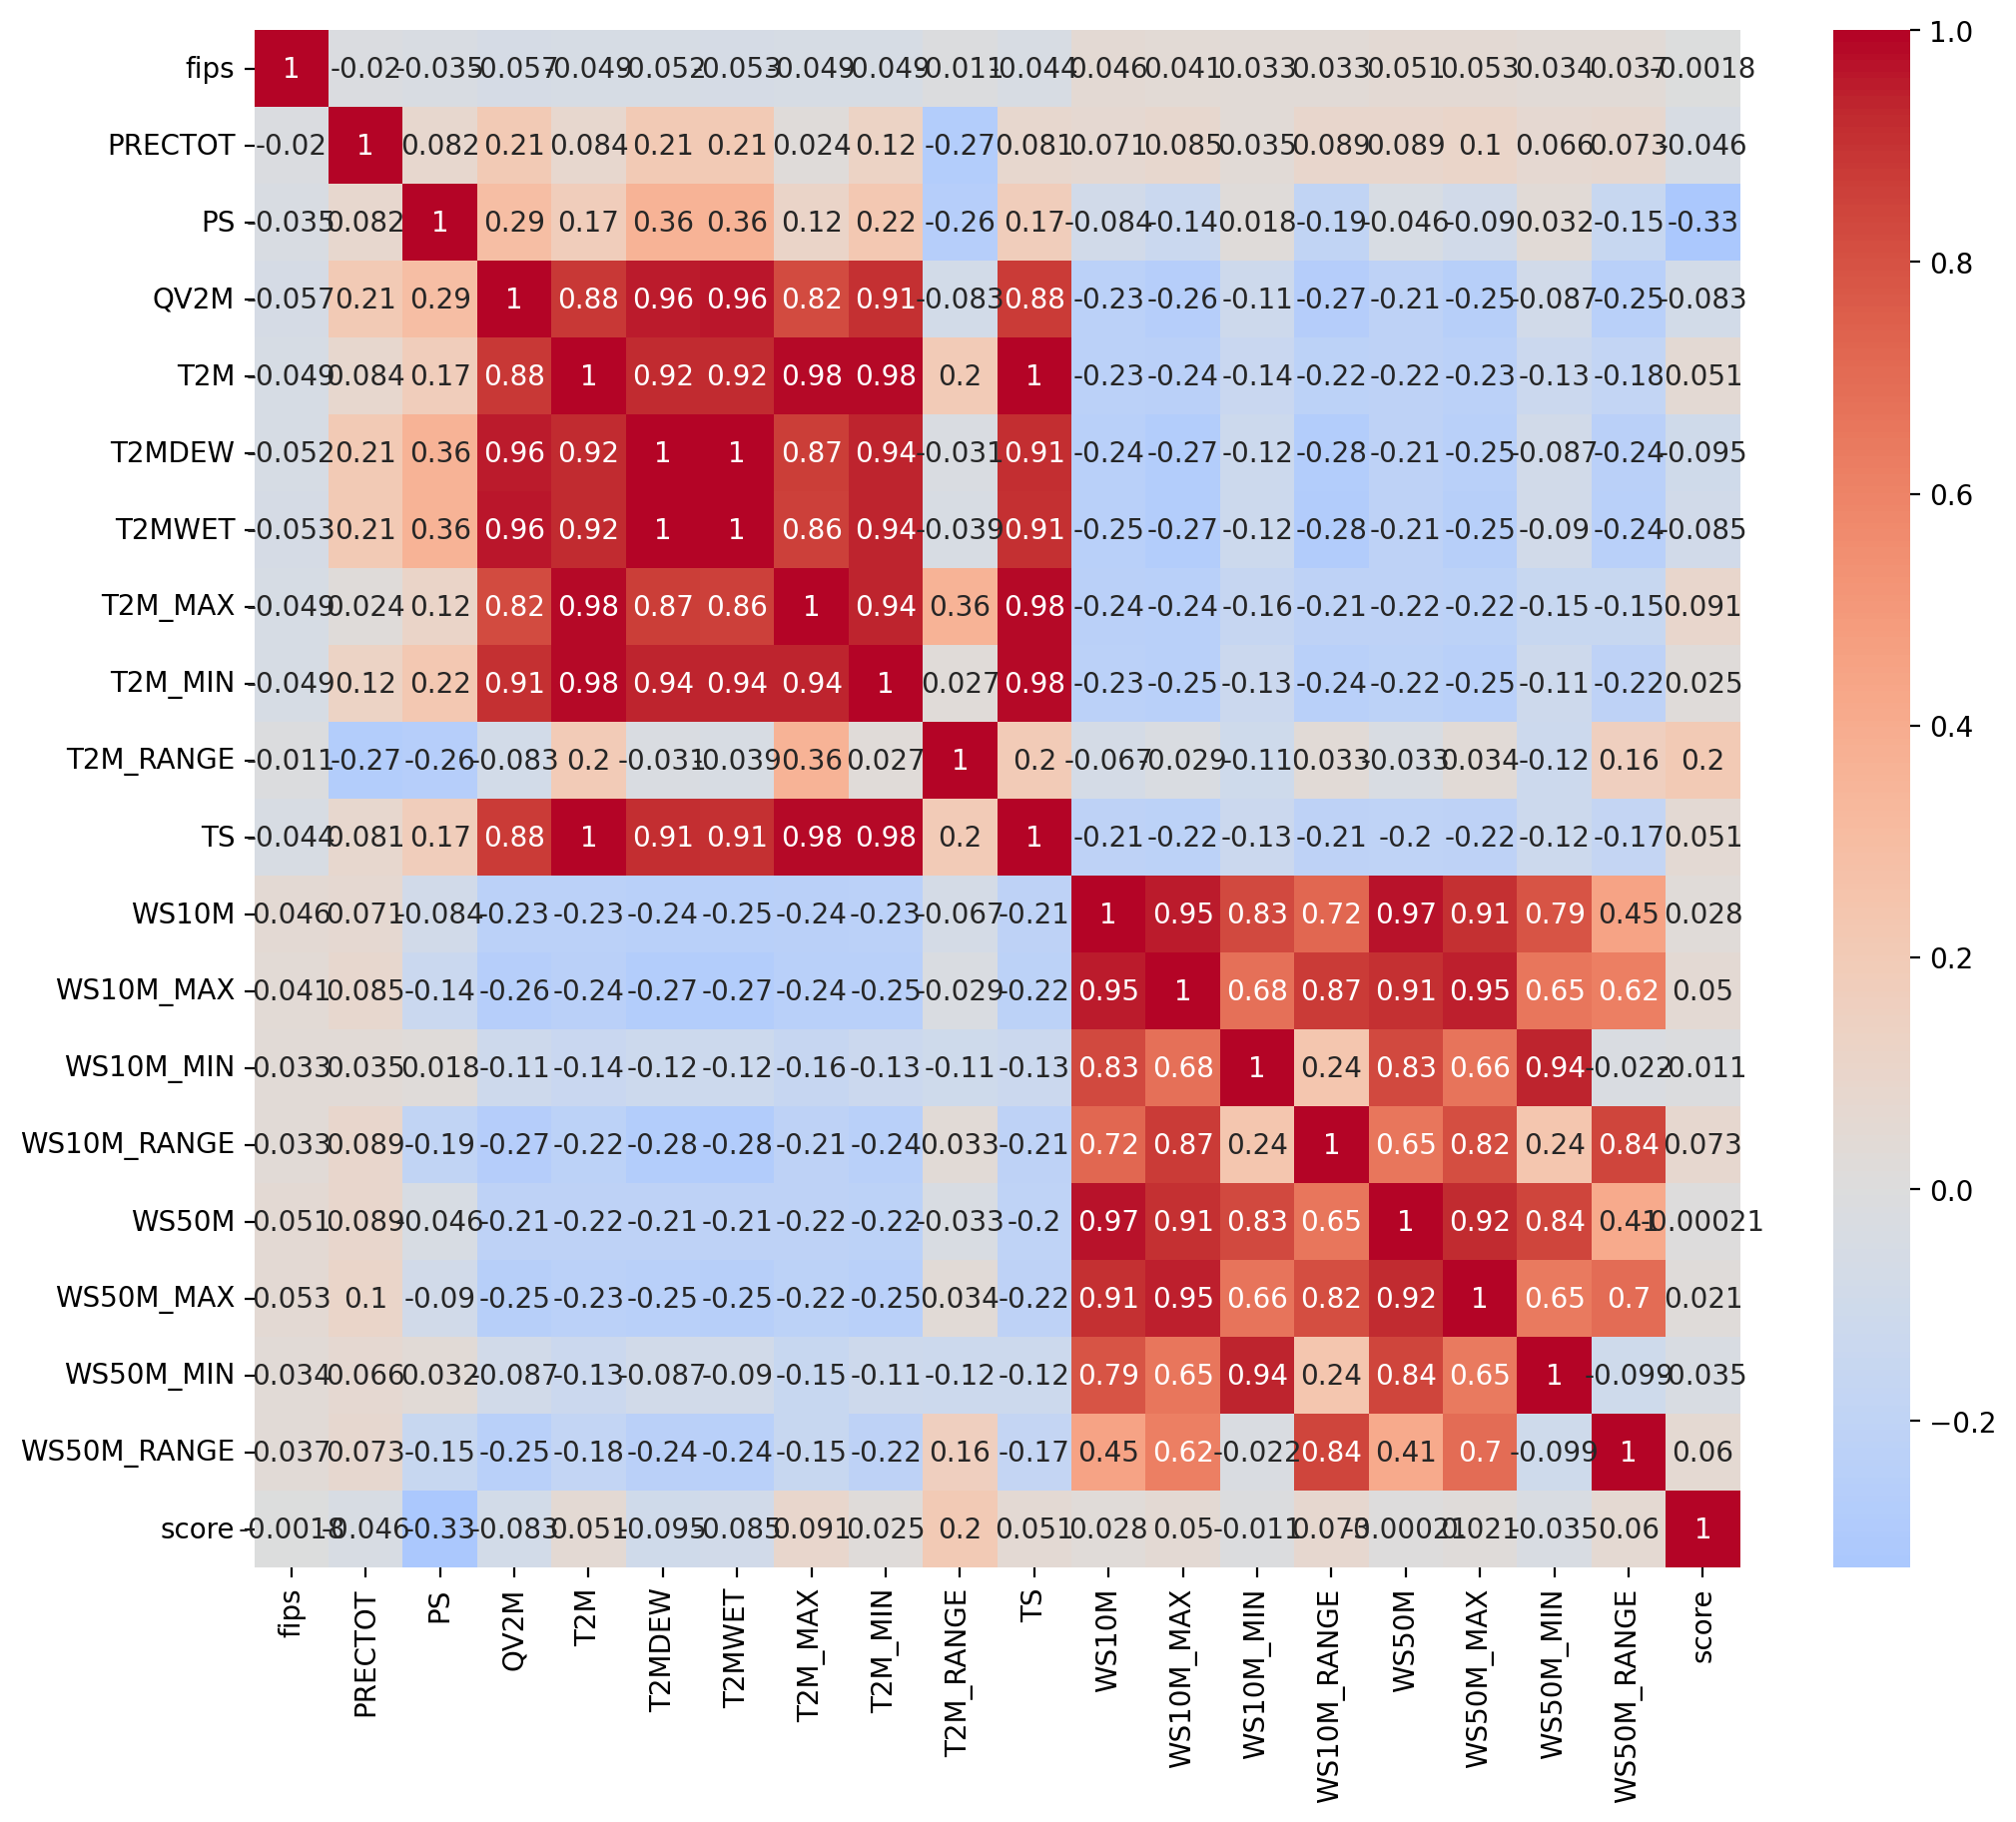

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df_met.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax)

<Axes: >

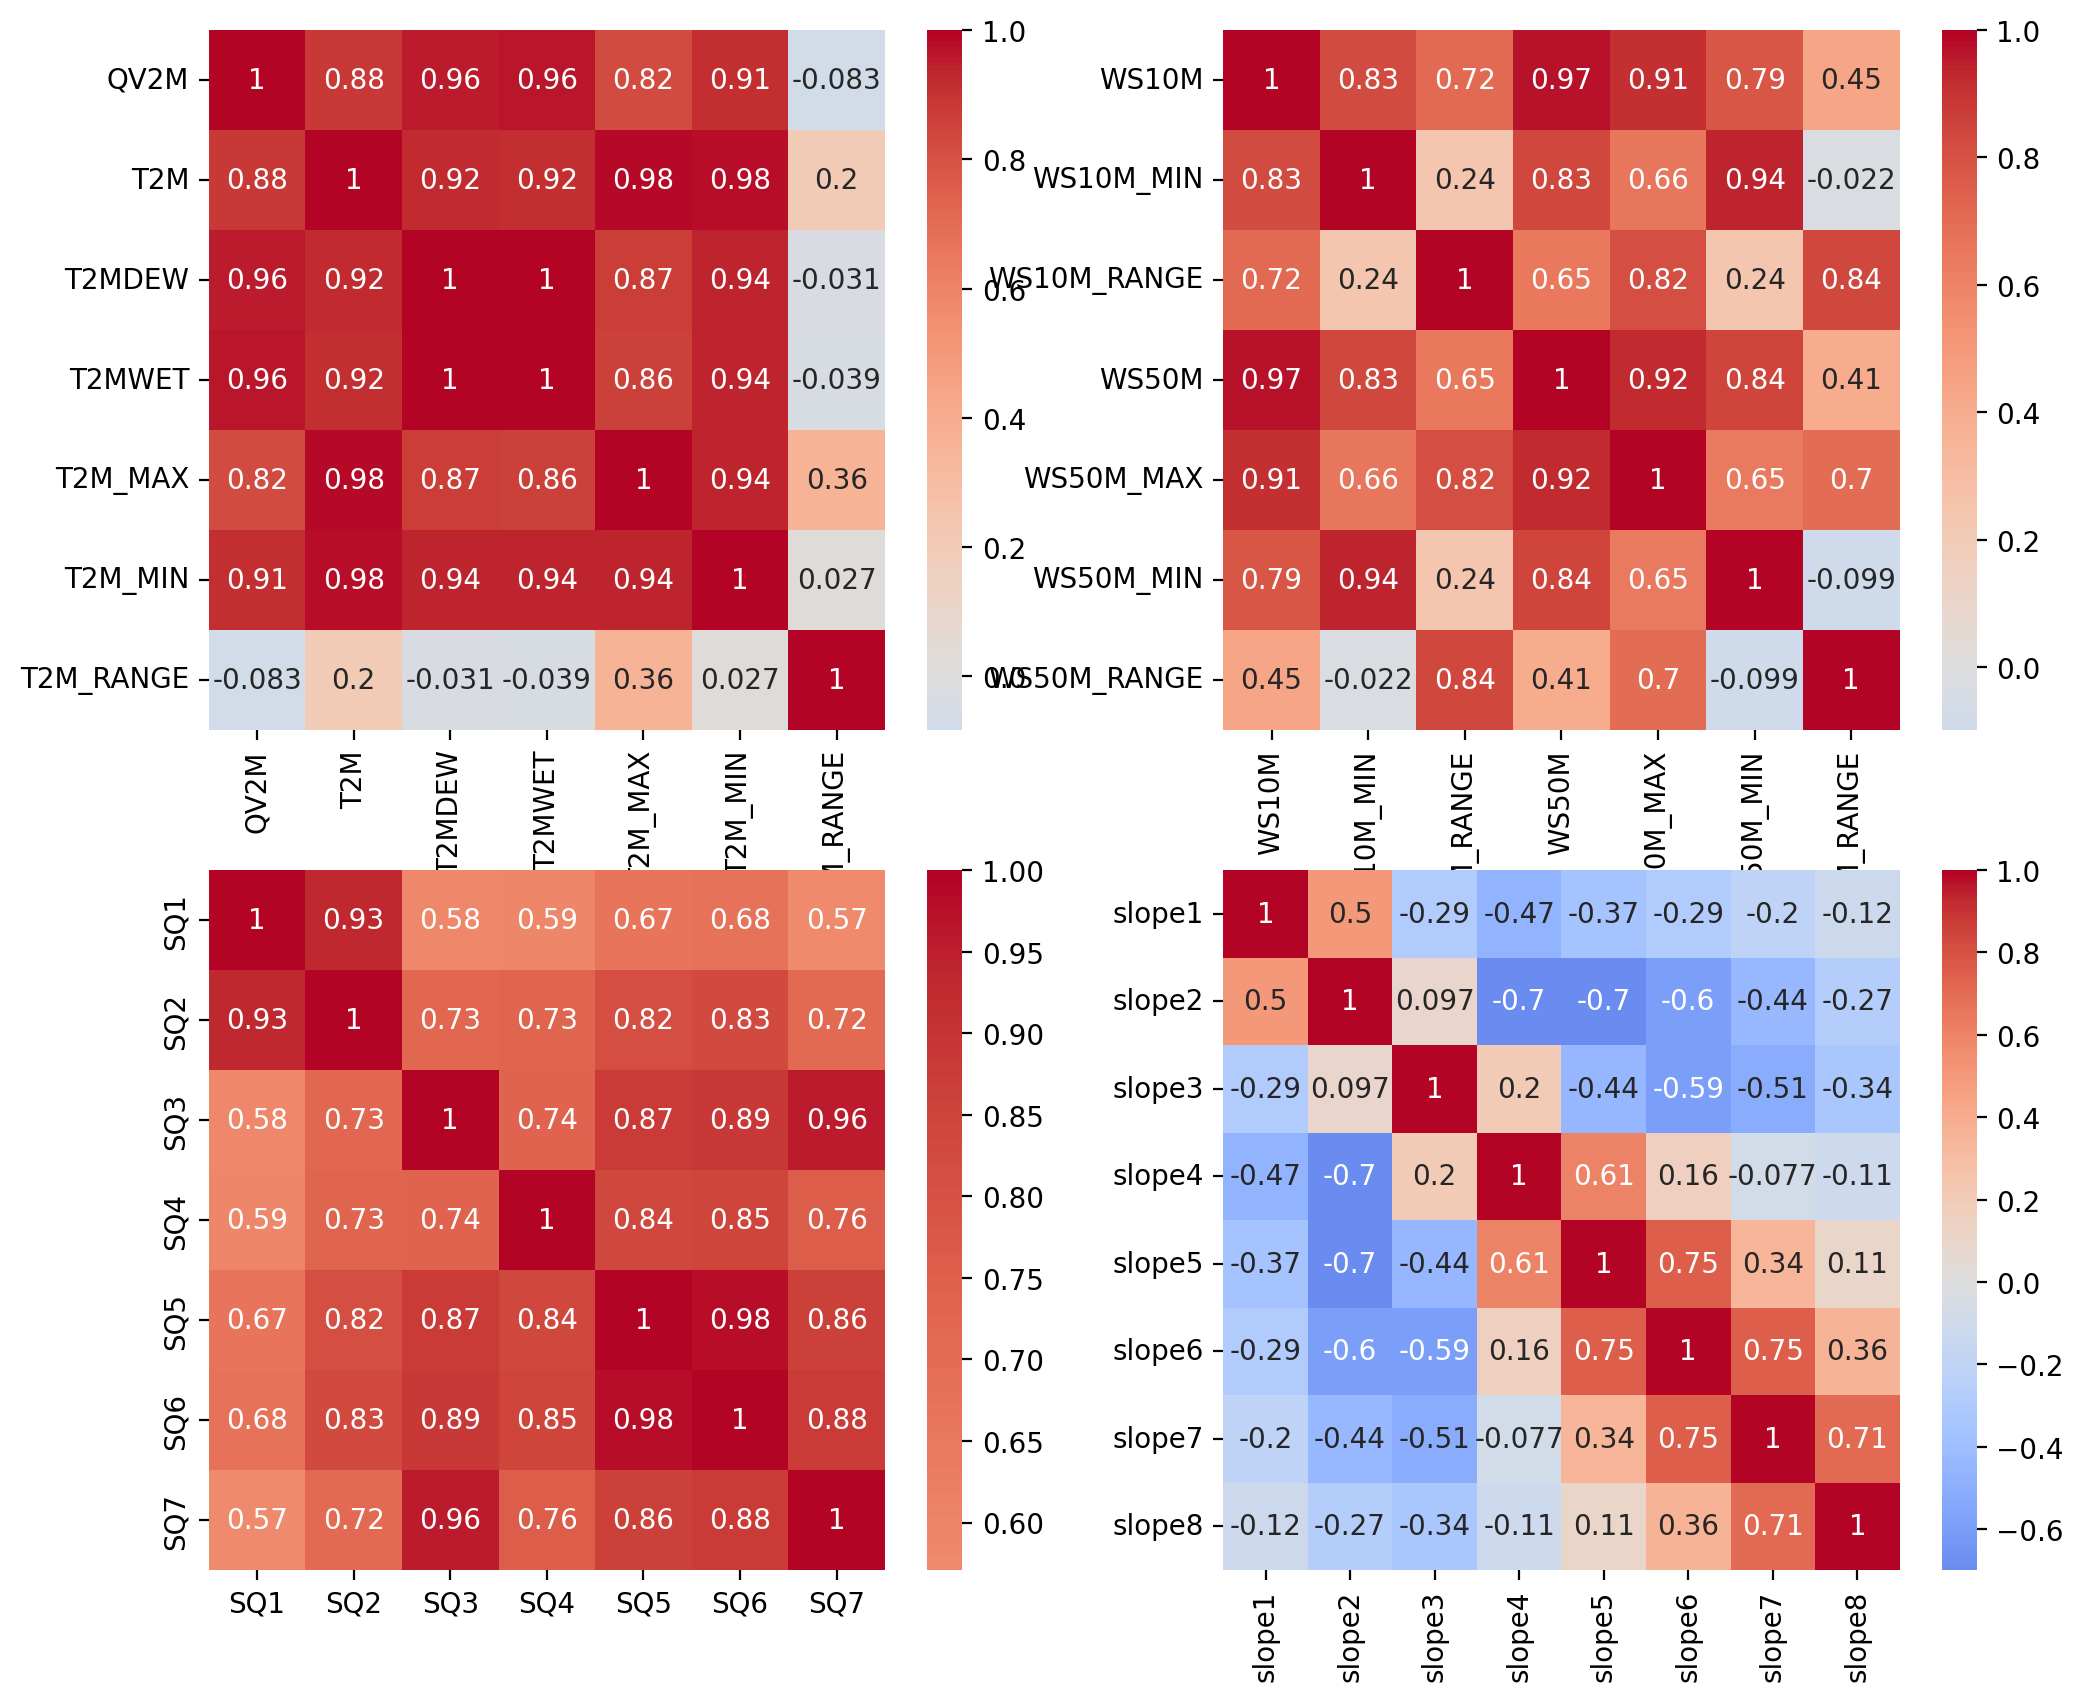

In [ ]:
df_met_temp = df_met.loc[:, ['QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE']]
df_met_wind = df_met.loc[:, ['WS10M', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE']]
fig, ax = plt.subplots(nrows = 2, figsize=(12, 10), dpi=200)
sns.heatmap(df_met_temp.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax[0])
sns.heatmap(df_met_wind.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax[1])


In [ ]:
sns.histplot(df_met.loc[:, ['score']])